<a href="https://colab.research.google.com/github/maah-gabs/Python_do_zero/blob/master/Analisando_seus_dados_do_Gmail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 04 - Aula 12 Analisando seus dados do Gmail

Antes de iniciar o projeto, você precisará acessar a sua conta do *Gmail* no mesmo navegador que está usando agora. Assim que você logar, clique [aqui](https://takeout.google.com/settings/takeout).

Você abrirá a página do Takeout, essa págna te oferecerá diversos dados e serviços que podem ser baixados, po´rm o foco nessa aula será os e-mails. 

<center><img width="50%" src="https://github.com/rafaelnduarte/sigmoidal_data/blob/master/Screen%20Shot%202020-09-16%20at%2011.09.01%20AM.png?raw=true"></center>

Selecione, **apenas Gmail**. 

<center><img width="50%" src="https://github.com/rafaelnduarte/sigmoidal_data/blob/master/Screen%20Shot%202020-09-16%20at%2011.09.17%20AM.png?raw=true"></center>

Vamos selecionar o link para *download* para que ele seja enviado por email em formato`.zip`, selecione o tamanho do arquivo para 50 gb. 

<center><img width="50%" src="https://github.com/rafaelnduarte/sigmoidal_data/blob/master/Screen%20Shot%202020-09-16%20at%2011.19.50%20AM.png?raw=true"></center>

In [85]:
# Importando as bibliotecas necessárias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mailbox
import re 
import pytz
import seaborn as sns

## Carregando os dados 

Assim que você fez o upload vamos fazer o download dele no google colab. 

In [87]:
# Descompactar o arquivo que está em formato zip 
!unzip /content/takeout-20200921T181301Z-001.zip

Archive:  /content/takeout-20200921T181301Z-001.zip
replace Takeout/E-mail/Todos os e-mails, incluindo Spam e Lixeira.mbox? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Agora que fizemos o download e descompactamos o arquivo é hora de carregar os dados do nosso email. Neste momento, vamos utilizar a biblioteca `mailbox` para carregar o arquivo do tipo `mbox` que está contido no arquivo em `zip.`

In [88]:
# Carregando o arquivo 
mbox = mailbox.mbox("/content/Takeout/E-mail/Todos os e-mails, incluindo Spam e Lixeira.mbox")

In [89]:
# Visualizando as chaves 
mbox[0].keys()

['X-GM-THRID',
 'X-Gmail-Labels',
 'Delivered-To',
 'Received',
 'X-Google-Smtp-Source',
 'X-Received',
 'ARC-Seal',
 'ARC-Message-Signature',
 'ARC-Authentication-Results',
 'Return-Path',
 'Received',
 'Received-SPF',
 'Authentication-Results',
 'DKIM-Signature',
 'Received',
 'From',
 'To',
 'Subject',
 'Date',
 'List-Unsubscribe',
 'MIME-Version',
 'Reply-To',
 'List-ID',
 'X-CSA-Complaints',
 'X-SFMC-Stack',
 'x-job',
 'Message-ID',
 'Feedback-ID',
 'Content-Type']

### Criando um Data Frame 

Para que sejamos capazes de trabalhar com esses dados, a gente vai extrair as informações e construir um DataFrame. 

De inicio, vamos criar um dicionário em que as chaves são as informações que já queremos puxar as informações do email. 

In [90]:
# Criando o dicionário 
email_dict = {
    'date': [], 
    'from': [],
    'to': [], 
    'subject':[], 
    'labels': []
}

# Coletando os dados 
for message in mbox:
  email_dict['date'].append(message['date'])
  email_dict['from'].append(message['from'])
  email_dict['to'].append(message['to'])
  email_dict['subject'].append(message['subject'])
  email_dict['labels'].append(message['X-Gmail-Labels'])

In [91]:
# Transformando em DataFrame 
df = pd.DataFrame(email_dict)

In [92]:
# Visualizando as primeiras entradas 
df.head()

,date,from,to,subject,labels
0,"Fri, 11 Sep 2020 10:42:34 -0600","""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Write like a pro. Here's 30% off Grammarly Pre...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
1,"Fri, 01 May 2020 18:17:10 -0700","""Samsung"" <no-reply@m21.email.samsung.com>",<mfurlanetobarros@gmail.com>,=?utf-8?B?8J+kqU1hcmlhZ2FicmllbGEsIHNpbnRhIGEg...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
2,"Sun, 13 Sep 2020 10:42:37 -0600","""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Last Chance: 30% Off a Grammarly Premium Upgrade,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5..."
3,"Sun, 06 Sep 2020 18:17:35 -0600","""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Improve Your Written Communication Everywhere,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
4,"Fri, 11 Sep 2020 04:48:25 -0700","""Samsung"" <no-reply@m21.email.samsung.com>",<mfurlanetobarros@gmail.com>,=?windows-1252?Q?=DAltima_chance_para_ganhar_u...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."


In [100]:
# Verificando os tipos
df.dtypes

date       datetime64[ns, UTC]
from                    object
to                      object
subject                 object
labels                  object
dtype: object

Ao verificar os tipos de dados das variáveis, é possível perceber que vamos precisar utilizar o `date` que naõ está em formato `datetime` e sim em formato `object`, sendo assim, é necessário realizar a conversão. 

Porém, essa informação, contida no DataSet de *Time Zones* e é necessário passar o parametro `utc = True`.

In [ ]:
df.loc[df['date'] == 'Fri, 5 Apr 2019 19:34:11 +0000 (GMT+00:00)']

,date,from,to,subject,labels
38,"Fri, 5 Apr 2019 19:34:11 +0000 (GMT+00:00)",Samsung account <SA.noreply@samsung-mail.com>,Maria GabrielaFurlaneto Barros <mfurlanetobarr...,=?UTF-8?Q?Notifica=C3=A7=C3=A3o_de_login_da_Sa...,"Caixa de entrada,Aberto,Categoria: pessoal"


In [99]:
# convertendo date para datetime - DAAAAANDO ERRO 
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

#Visualizando df
df.head()

,date,from,to,subject,labels
0,2020-09-11 16:42:34+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Write like a pro. Here's 30% off Grammarly Pre...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
1,2020-05-02 01:17:10+00:00,"""Samsung"" <no-reply@m21.email.samsung.com>",<mfurlanetobarros@gmail.com>,=?utf-8?B?8J+kqU1hcmlhZ2FicmllbGEsIHNpbnRhIGEg...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
2,2020-09-13 16:42:37+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Last Chance: 30% Off a Grammarly Premium Upgrade,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5..."
3,2020-09-07 00:17:35+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Improve Your Written Communication Everywhere,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
4,2020-09-11 11:48:25+00:00,"""Samsung"" <no-reply@m21.email.samsung.com>",<mfurlanetobarros@gmail.com>,=?windows-1252?Q?=DAltima_chance_para_ganhar_u...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."



Precisamos que a informação de *time zone* esteja condizente com a Time Zone que nos encontramos. Para isso, aplicaremos uma função *lambda* para aplicar às entradas o método timezone da biblioteca `pytz` para que possamos ter a informação correta de *time zone*.

Abaixo, seguimos para analisar se existem dados ausentes. Como a quantidade neste caso é pequena, vamos excluir essas linhas. 

In [102]:
df.isnull().sum()

date       99
from        0
to         98
subject    95
labels      0
dtype: int64

In [103]:
# Excluindo as linhas 
df.dropna(how='any', inplace=True)

In [104]:
# Verficando 
df.isnull().sum()

date       0
from       0
to         0
subject    0
labels     0
dtype: int64

## Limpeza de Strings 

Após executar os dados acima, conseguimos perceber que existem muitas informações que estão confusas. Desta forma, vamos realizar uma limpeza das entradas. 

Vamos iniciar com a limpeza dos dados. Sendo assim, vamos utilizar um função para retirar tudo aquilo que faz parte do endereço de email 

In [78]:
# criando a função
def extrair_email(string_email):
    email = re.findall(r'<(.+?)>', string_email)
    if email:
        return email[0]
    else:
        return string_email

In [79]:
# aplicando a função
df['to'] = df['to'].apply(extrair_email)
df['from'] = df['from'].apply(extrair_email)

In [80]:
# Visualizando 
df.head()

,date,from,to,subject,labels
0,"Fri, 11 Sep 2020 10:42:34 -0600",info@send.grammarly.com,mfurlanetobarros@gmail.com,Write like a pro. Here's 30% off Grammarly Pre...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
1,"Fri, 01 May 2020 18:17:10 -0700",no-reply@m21.email.samsung.com,mfurlanetobarros@gmail.com,=?utf-8?B?8J+kqU1hcmlhZ2FicmllbGEsIHNpbnRhIGEg...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
2,"Sun, 13 Sep 2020 10:42:37 -0600",info@send.grammarly.com,mfurlanetobarros@gmail.com,Last Chance: 30% Off a Grammarly Premium Upgrade,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5..."
3,"Sun, 06 Sep 2020 18:17:35 -0600",info@send.grammarly.com,mfurlanetobarros@gmail.com,Improve Your Written Communication Everywhere,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."
4,"Fri, 11 Sep 2020 04:48:25 -0700",no-reply@m21.email.samsung.com,mfurlanetobarros@gmail.com,=?windows-1252?Q?=DAltima_chance_para_ganhar_u...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3..."


Agora, vamos limpar a coluna label. 

A função irá retirar as informações desnecessárias e dividir os itens por vírgula que retornará apenas o primeiro item

In [81]:
# criando a função
def extrair_label(string_labels):
    return string_labels.replace("=?UTF-8?Q?", "").split(",")[0]

In [82]:
# aplicando a função
df["labels"] = df["labels"].apply(extrair_label)

In [83]:
df.head()

,date,from,to,subject,labels
0,"Fri, 11 Sep 2020 10:42:34 -0600",info@send.grammarly.com,mfurlanetobarros@gmail.com,Write like a pro. Here's 30% off Grammarly Pre...,Caixa_de_entrada
1,"Fri, 01 May 2020 18:17:10 -0700",no-reply@m21.email.samsung.com,mfurlanetobarros@gmail.com,=?utf-8?B?8J+kqU1hcmlhZ2FicmllbGEsIHNpbnRhIGEg...,Caixa_de_entrada
2,"Sun, 13 Sep 2020 10:42:37 -0600",info@send.grammarly.com,mfurlanetobarros@gmail.com,Last Chance: 30% Off a Grammarly Premium Upgrade,Lixeira
3,"Sun, 06 Sep 2020 18:17:35 -0600",info@send.grammarly.com,mfurlanetobarros@gmail.com,Improve Your Written Communication Everywhere,Caixa_de_entrada
4,"Fri, 11 Sep 2020 04:48:25 -0700",no-reply@m21.email.samsung.com,mfurlanetobarros@gmail.com,=?windows-1252?Q?=DAltima_chance_para_ganhar_u...,Caixa_de_entrada


### Análise Exploratória 

Agora, iniciaremos a análise exploratória. A primeira análise a ser feita, é relacionada aos remetentes de email. 

In [84]:
# Verificando os emails que mais me enviarem email para a minha caixa de entrada 
df[df["labels"] ==  "Caixa_de_entrada"] ["from"].value_counts()[0:5]

no-reply@m21.email.samsung.com    59
info@send.grammarly.com            7
noreply@youtube.com                3
SA.noreply@samsung-mail.com        3
no-reply@login.accountkit.com      3
Name: from, dtype: int64

In [105]:
# Criando uma variável de dia da semana 
df['weekday'] = df["date"].dt.weekday

In [106]:
#Verificando a criação 
df.head()

,date,from,to,subject,labels,weekday
0,2020-09-11 16:42:34+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Write like a pro. Here's 30% off Grammarly Pre...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",4
1,2020-05-02 01:17:10+00:00,"""Samsung"" <no-reply@m21.email.samsung.com>",<mfurlanetobarros@gmail.com>,=?utf-8?B?8J+kqU1hcmlhZ2FicmllbGEsIHNpbnRhIGEg...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",5
2,2020-09-13 16:42:37+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Last Chance: 30% Off a Grammarly Premium Upgrade,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5...",6
3,2020-09-07 00:17:35+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Improve Your Written Communication Everywhere,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",0
4,2020-09-11 11:48:25+00:00,"""Samsung"" <no-reply@m21.email.samsung.com>",<mfurlanetobarros@gmail.com>,=?windows-1252?Q?=DAltima_chance_para_ganhar_u...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",4


Perceba, que ao criar a coluna, transformaremos as informações de uma forma que fique mais simples interpretar e digerir. Desta forma, precisamos criar uma associação, em que 0 - Segunda - Feira, e assim, sucessivamente. 

Desta forma, vamos criar um dicionário em que associaremos para as chaves, valores em formato de `string `para os dias da semana e transforma a nossa coluna a partir desse dicionário. 

In [107]:
# criando dicionário
dias_semana = {0:"Segunda", 1:"Terça", 2:"Quarta",3:"Quinta", 4:"Sexta", 5:"Sábado", 6:"Domingo"}

# transformando a coluna
df["weekday"] = df["weekday"].replace(dias_semana)

In [108]:
# Verificando os resultados 
df.head()

,date,from,to,subject,labels,weekday
0,2020-09-11 16:42:34+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Write like a pro. Here's 30% off Grammarly Pre...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",Sexta
1,2020-05-02 01:17:10+00:00,"""Samsung"" <no-reply@m21.email.samsung.com>",<mfurlanetobarros@gmail.com>,=?utf-8?B?8J+kqU1hcmlhZ2FicmllbGEsIHNpbnRhIGEg...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",Sábado
2,2020-09-13 16:42:37+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Last Chance: 30% Off a Grammarly Premium Upgrade,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5...",Domingo
3,2020-09-07 00:17:35+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Improve Your Written Communication Everywhere,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",Segunda
4,2020-09-11 11:48:25+00:00,"""Samsung"" <no-reply@m21.email.samsung.com>",<mfurlanetobarros@gmail.com>,=?windows-1252?Q?=DAltima_chance_para_ganhar_u...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",Sexta


Agora que temos as principais informações e ,então, biblioteca `seaborn`. 

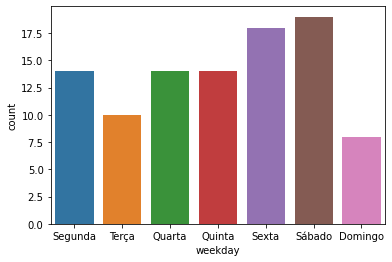

In [109]:
# plotando o countplot
sns.countplot(df["weekday"], order=["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]);

Nesta análise, sabemos que **Sabado** consiste no maior volume de dados do que qualquer outro dia da semana. Porém, qual será o horário que os emails são enviados? 

In [111]:
# coletando as horas
df["hora"] = df["date"].dt.hour

In [112]:
df.head()

,date,from,to,subject,labels,weekday,hora
0,2020-09-11 16:42:34+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Write like a pro. Here's 30% off Grammarly Pre...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",Sexta,16
1,2020-05-02 01:17:10+00:00,"""Samsung"" <no-reply@m21.email.samsung.com>",<mfurlanetobarros@gmail.com>,=?utf-8?B?8J+kqU1hcmlhZ2FicmllbGEsIHNpbnRhIGEg...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",Sábado,1
2,2020-09-13 16:42:37+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Last Chance: 30% Off a Grammarly Premium Upgrade,"=?UTF-8?Q?Lixeira,Categoria:_promo=C3=A7=C3=B5...",Domingo,16
3,2020-09-07 00:17:35+00:00,"""Grammarly"" <info@send.grammarly.com>",<mfurlanetobarros@gmail.com>,Improve Your Written Communication Everywhere,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",Segunda,0
4,2020-09-11 11:48:25+00:00,"""Samsung"" <no-reply@m21.email.samsung.com>",<mfurlanetobarros@gmail.com>,=?windows-1252?Q?=DAltima_chance_para_ganhar_u...,"=?UTF-8?Q?Caixa_de_entrada,Categoria:_promo=C3...",Sexta,11


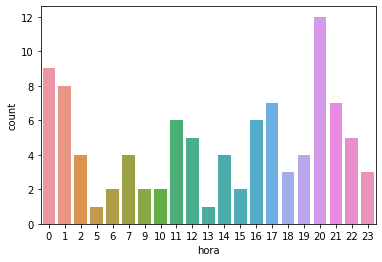

In [113]:
# plotando o gráfico
sns.countplot(df["hora"]);

In [114]:
# converter para formato de data que o Excel aceita
df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date()) 

In [115]:
df.to_excel("meu_gmail.xlsx", index=False)

#### WordClouds

Aqui, vamos mostrar uma outra possibilidade que trabalhar com palavras nos proporciona. É possível criar `Word Clouds`, ou nuvens de palavras, em tradução livre.

In [116]:
# importando os pacotes
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

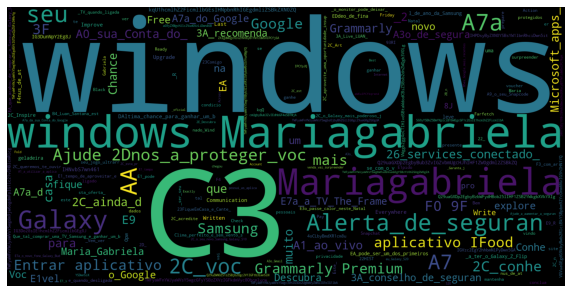

In [117]:
# criando a wordcloud
summary = df['subject']

all_summary = " ".join(s for s in summary)
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "ai", "UTF", "_http"], "hotmail", "gmail")
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);